<a href="https://colab.research.google.com/github/Viksilio/Analist/blob/main/%D0%9E%D1%81%D0%BD%D0%BE%D0%B2%D1%8B_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Основы машинного обучения

## Описание проекта

    Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных. 
    Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо. 
    Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас. 
    Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся. 
    Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет.

## Цель проекта

    Провести анализ и подготовить план действий по удержанию клиентов.  

## Задачи

- [X] Спрогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;  
- [X] Сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- [X] Проанализировать основные признаки, наиболее сильно влияющие на отток;
- [X] Сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
        - выделить целевые группы клиентов;
        - предложить меры по снижению оттока;
        - определить другие особенности взаимодействия с клиентами. 
    
## Описание данных

Данные клиента за предыдущий до проверки факта оттока месяц:
* 'gender' — пол;
* 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
* 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* 'Promo_friends' — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
* 'Phone' — наличие контактного телефона;
* 'Age' — возраст;
* 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).  

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
    
* 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
* 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
* 'Group_visits' — факт посещения групповых занятий;
* 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
* 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
* 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
* 'Churn' — факт оттока в текущем месяце. 

    Путь к файлу: /datasets/gym_churn.csv <a href="https://code.s3.yandex.net/datasets/gym_churn.csv">(скачать датасет)</a>

## Подключение библиотек и загрузка данных

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import plotly.express as px
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats
from sklearn.cluster import KMeans
import itertools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from scipy.cluster.hierarchy import dendrogram, linkage 
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(15, 10)) 
pd.set_option('display.max_colwidth', False)
RANDOM_STATE = 0

<Figure size 1080x720 with 0 Axes>

In [ ]:
try: 
    df = pd.read_csv('/datasets/gym_churn.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/gym_churn.csv')

## Исследовательский анализ данных (EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

В датафрейме отсутсвуют пропуски, общее количество данных для каждого признака равно 4000

In [ ]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Все столбцы, кроме 4-х: **Avg_additional_charges_total, Month_to_end_contract, Avg_class_frequency_total, Avg_class_frequency_current_month** имеют целочисленный формат

In [ ]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


В признаке **LIfetime** заметны выбросы

In [ ]:
## Посмотрим на значение 90, 95, 99 перцентиля для признака Lifetime
print(np.percentile(df['Lifetime'], [90, 95, 99])) 

[ 9. 11. 17.]


In [ ]:
## Очистим данные от выбросов
df = df[df['Lifetime'] < int(np.percentile(df['Lifetime'], [95]))]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3760 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             3760 non-null   int64  
 1   Near_Location                      3760 non-null   int64  
 2   Partner                            3760 non-null   int64  
 3   Promo_friends                      3760 non-null   int64  
 4   Phone                              3760 non-null   int64  
 5   Contract_period                    3760 non-null   int64  
 6   Group_visits                       3760 non-null   int64  
 7   Age                                3760 non-null   int64  
 8   Avg_additional_charges_total       3760 non-null   float64
 9   Month_to_end_contract              3760 non-null   float64
 10  Lifetime                           3760 non-null   int64  
 11  Avg_class_frequency_total          3760 non-null   float

Процент очищенных данных равен 6% от общего датасета

In [ ]:
df.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.506854,0.869952,0.537977,0.355687,0.905521,5.753612,0.463505,30.002964,158.314486,5.293072,3.859207,2.022047,2.024425
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


In [ ]:
churned = df[df['Churn'] == 1]
not_churned = df[df['Churn'] == 0]

In [ ]:
churned_cnt = churned['gender'].count()
not_churned_cnt = not_churned['gender'].count()
print(f'Пользователей из группы "отток" = {churned_cnt}, пользователей из группы "остались" = {not_churned_cnt}')

Пользователей из группы "отток" = 1061, пользователей из группы "остались" = 2699


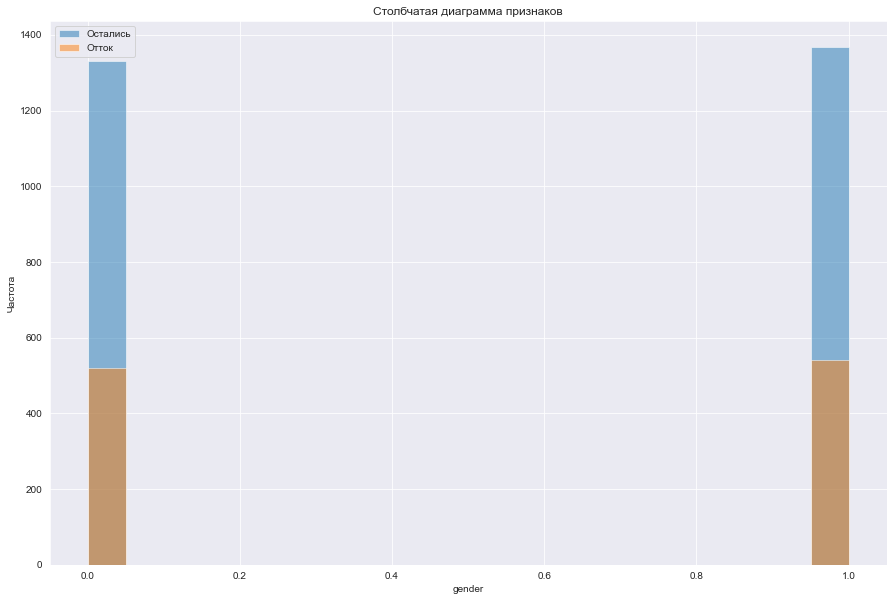

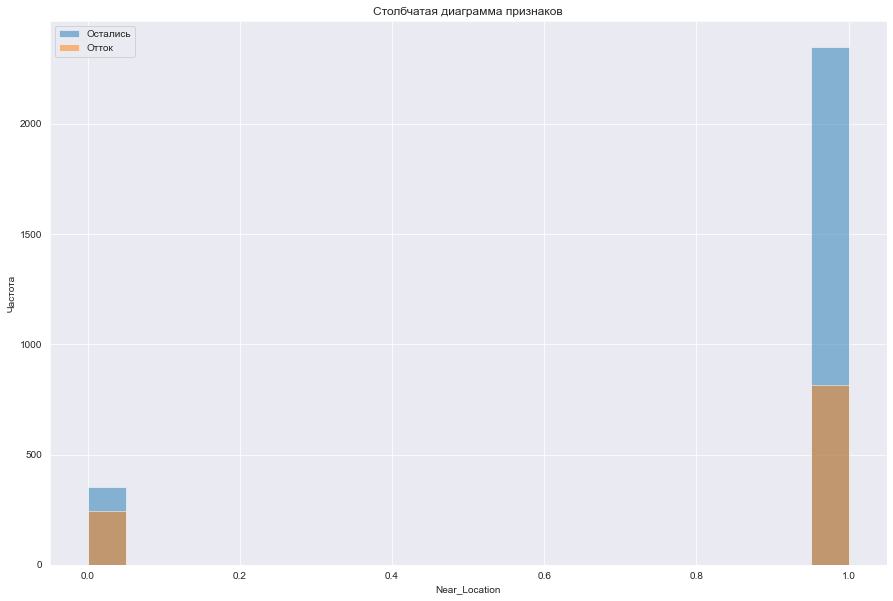

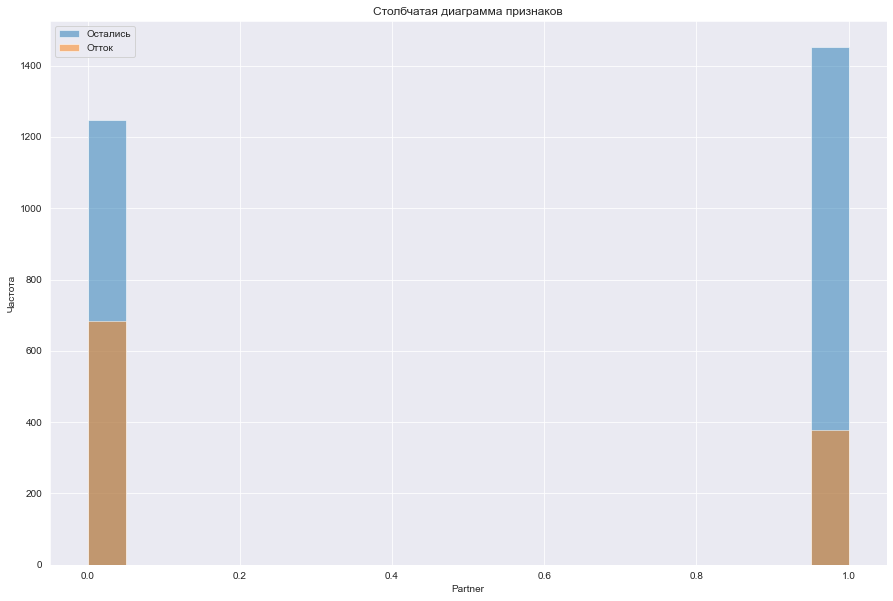

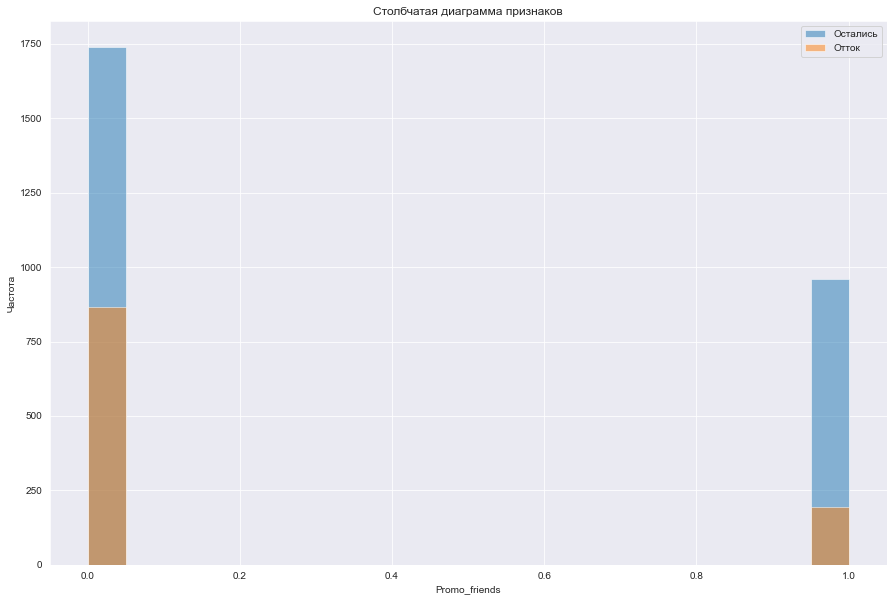

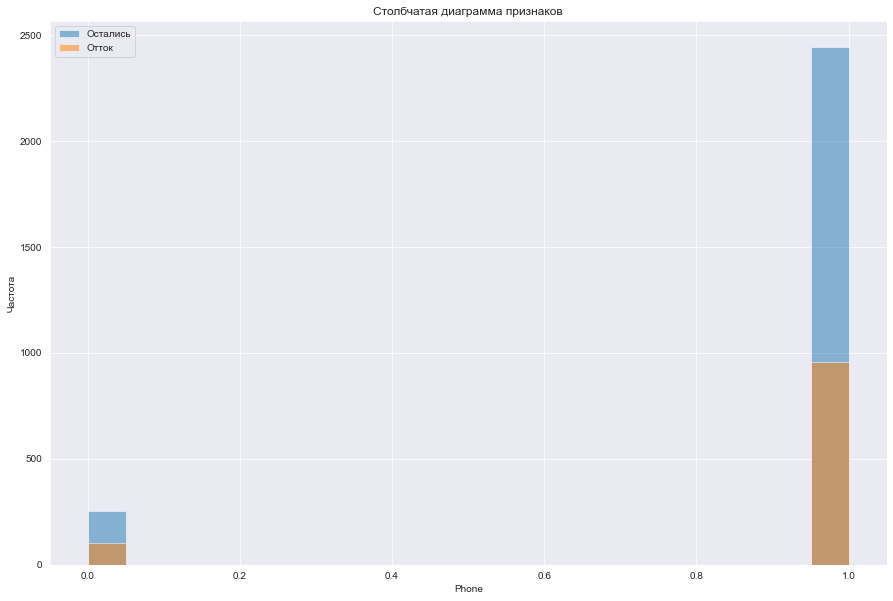

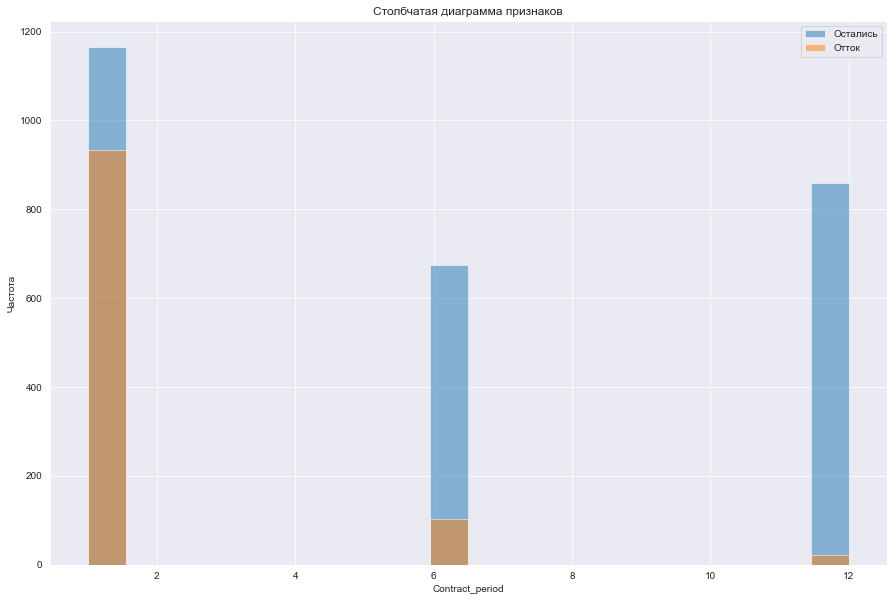

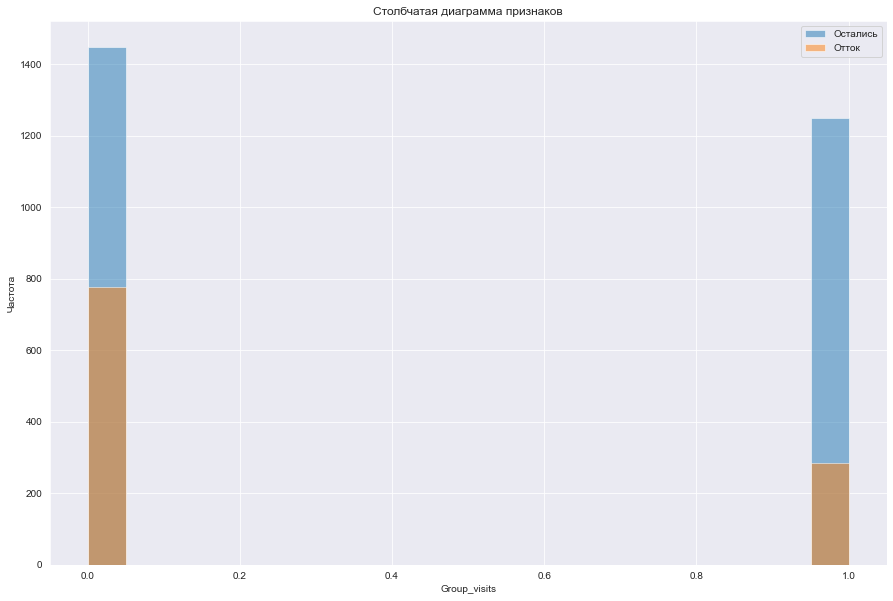

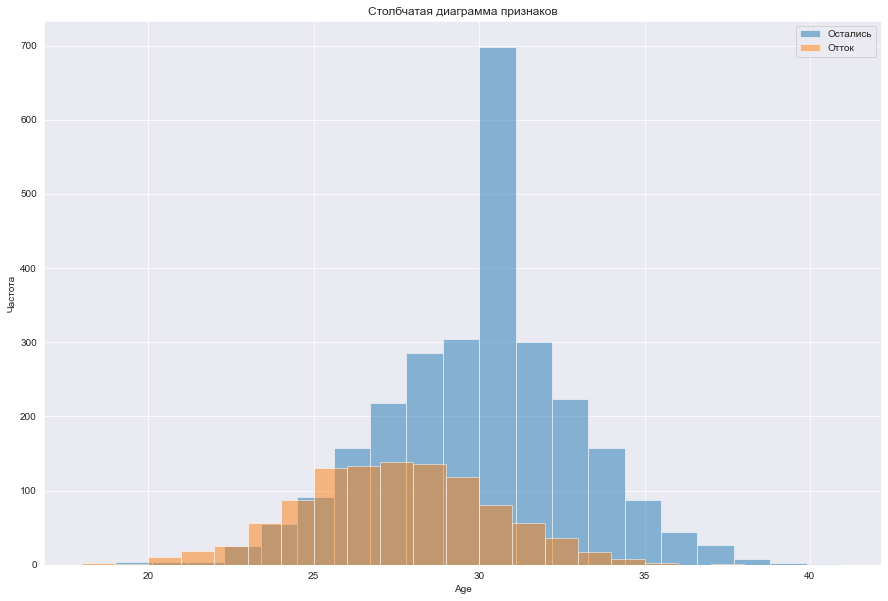

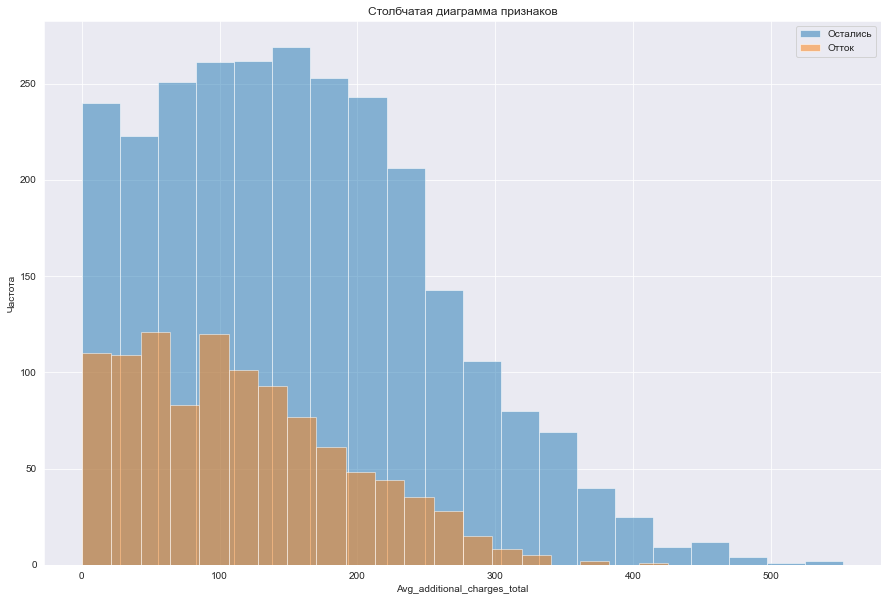

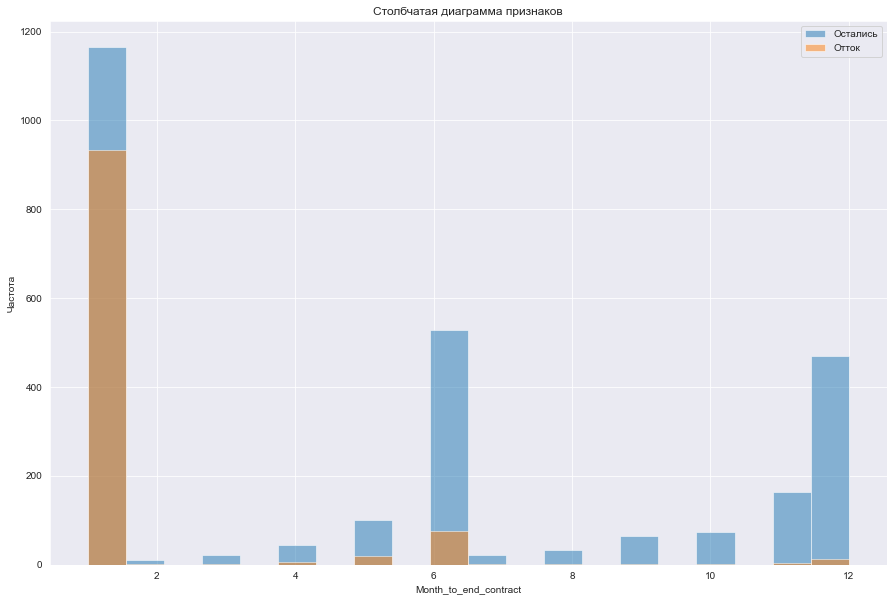

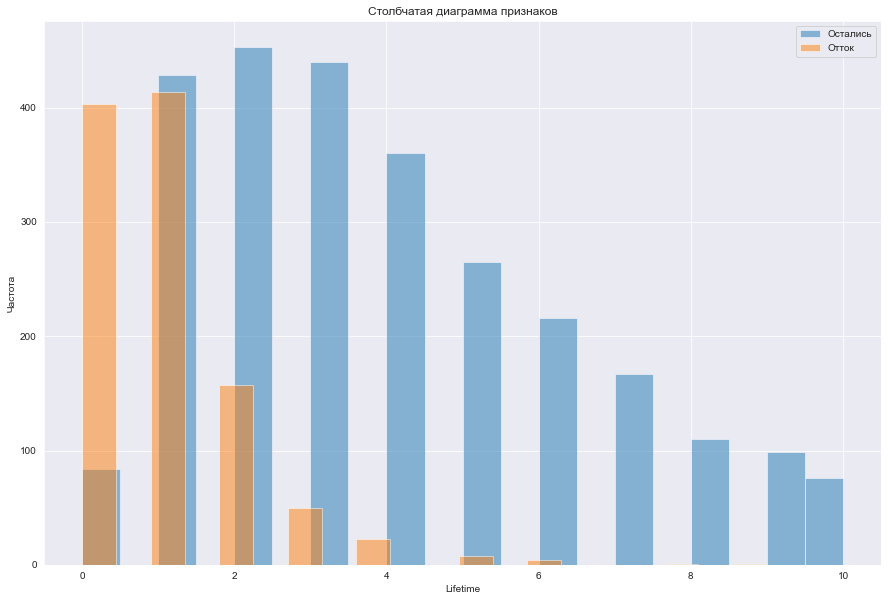

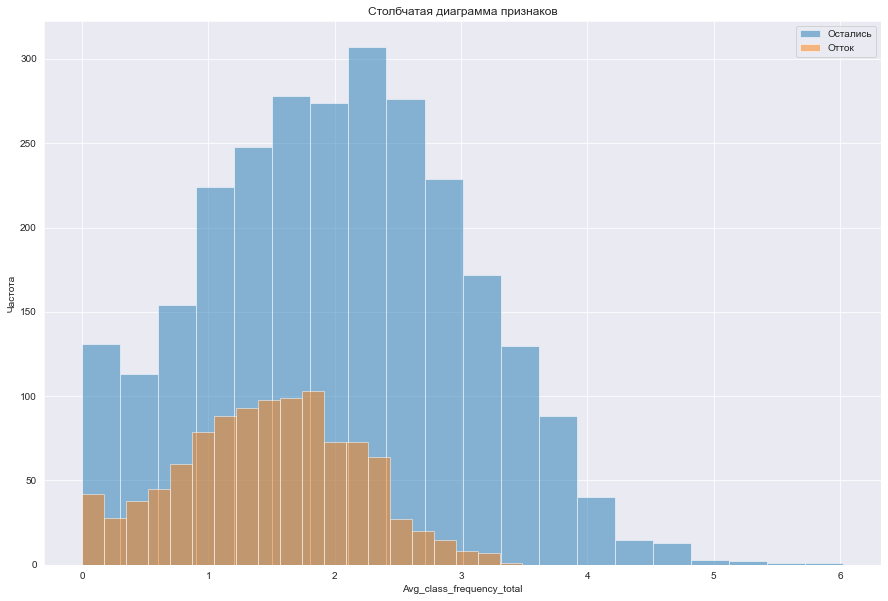

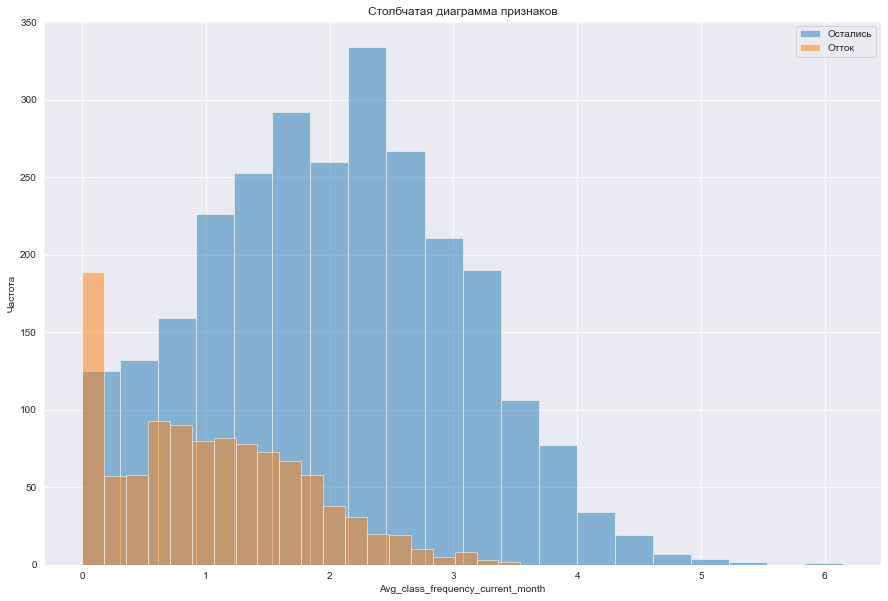

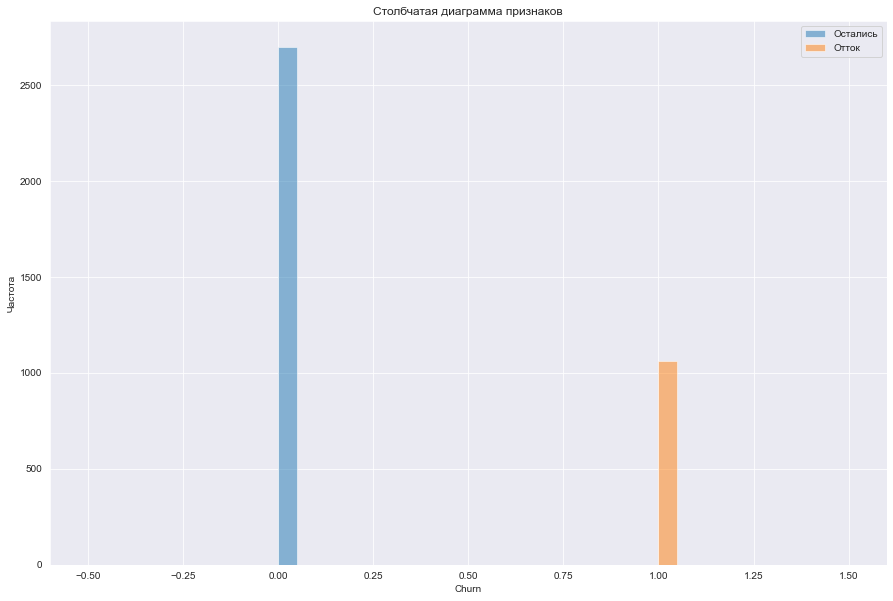

In [ ]:
for col in df.columns:
    plt.figure(figsize=(15, 10))
    plt.hist(not_churned[col], bins=20, alpha=0.5, label='Остались')
    plt.hist(churned[col], bins=20, alpha=0.5, label='Отток')
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.legend()
    plt.title('Столбчатая диаграмма признаков')
    plt.show()

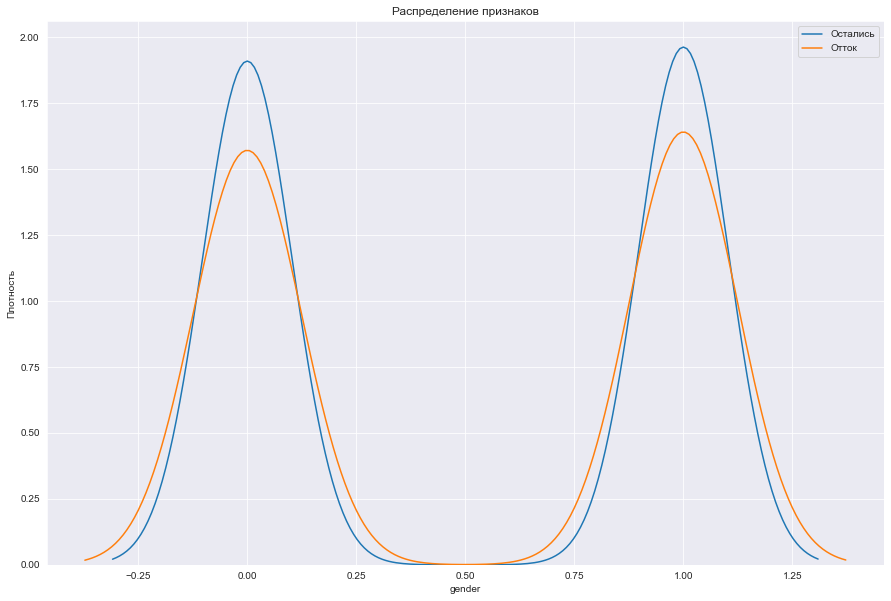

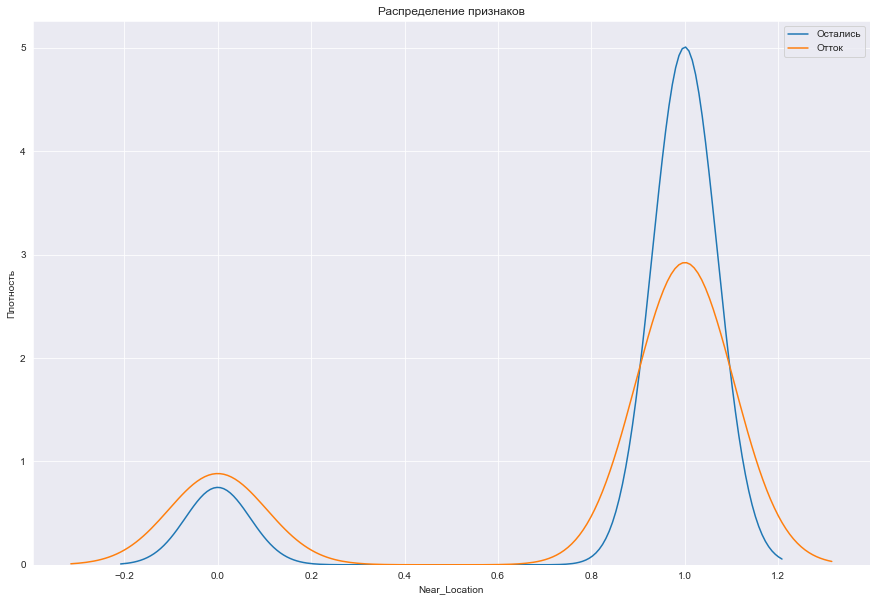

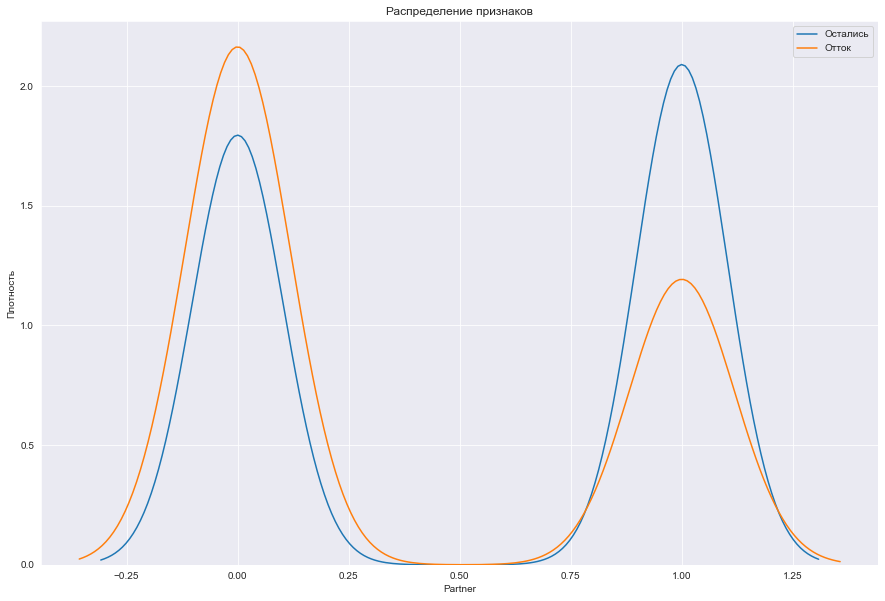

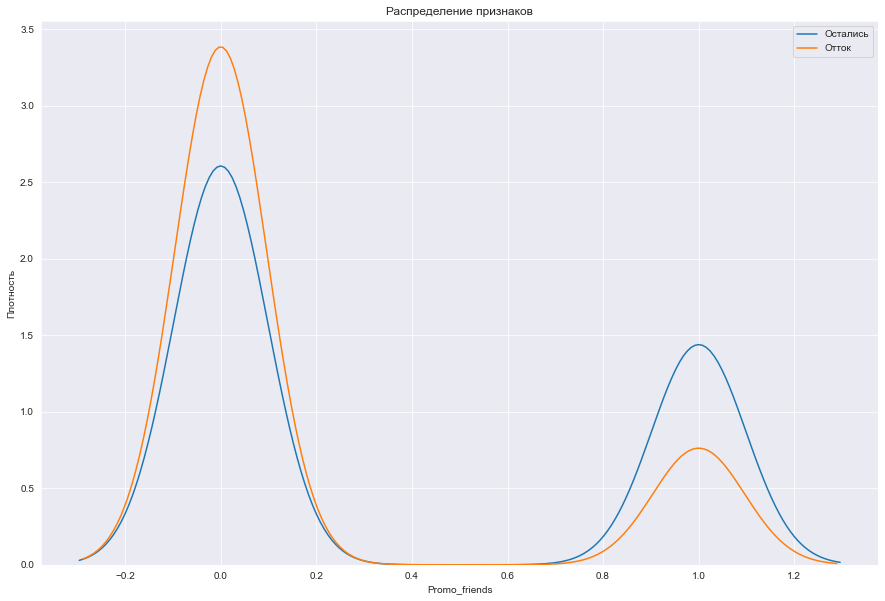

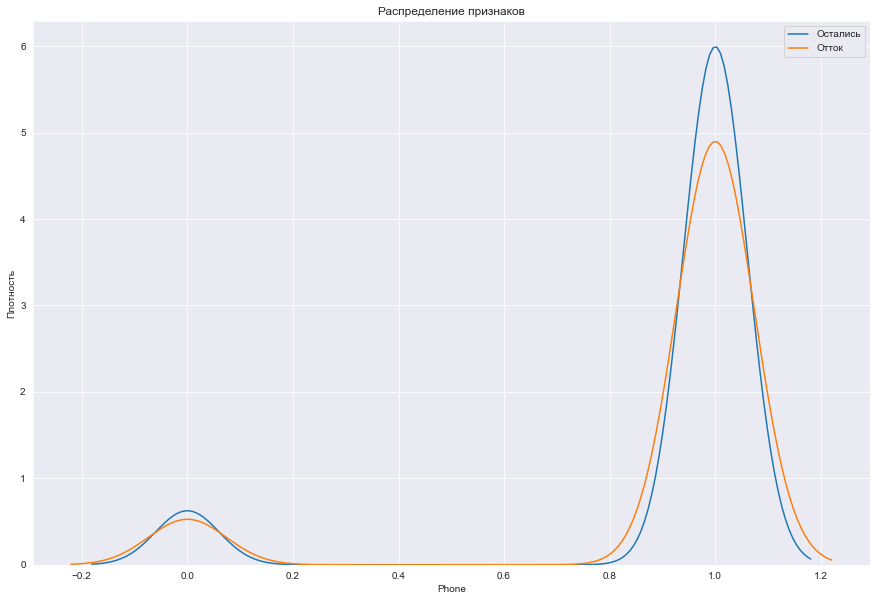

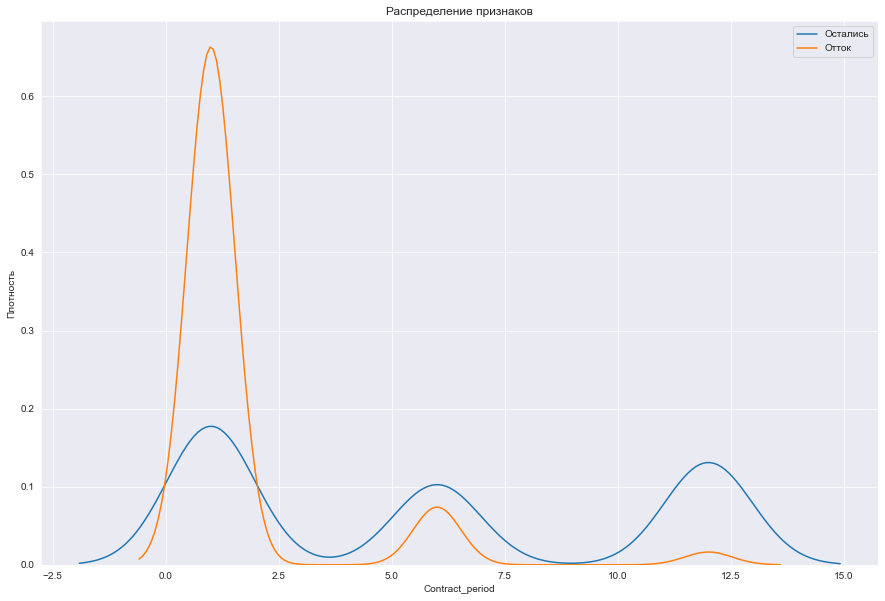

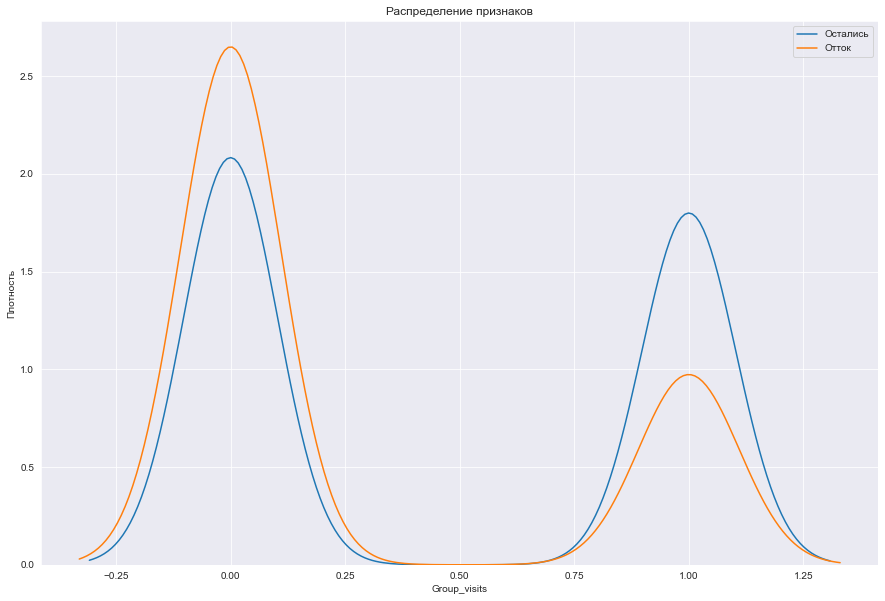

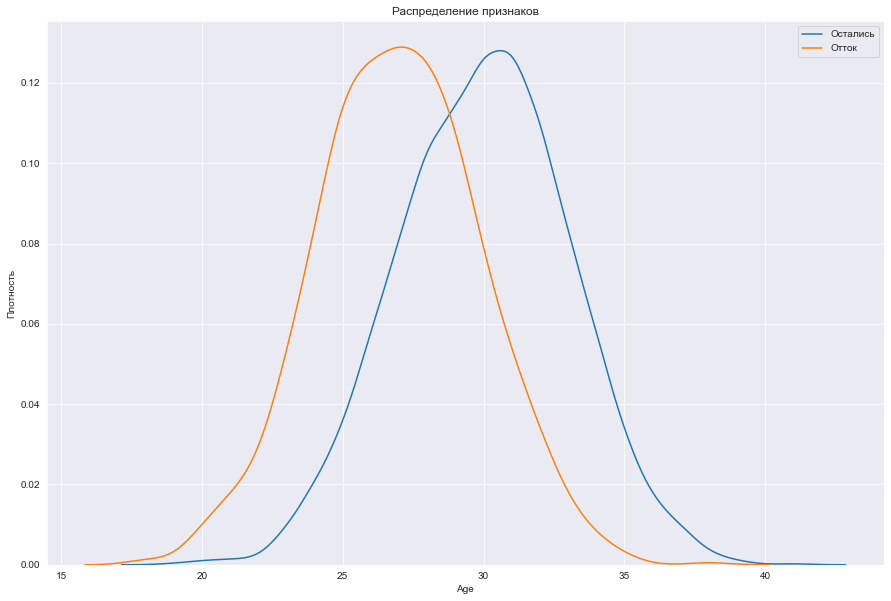

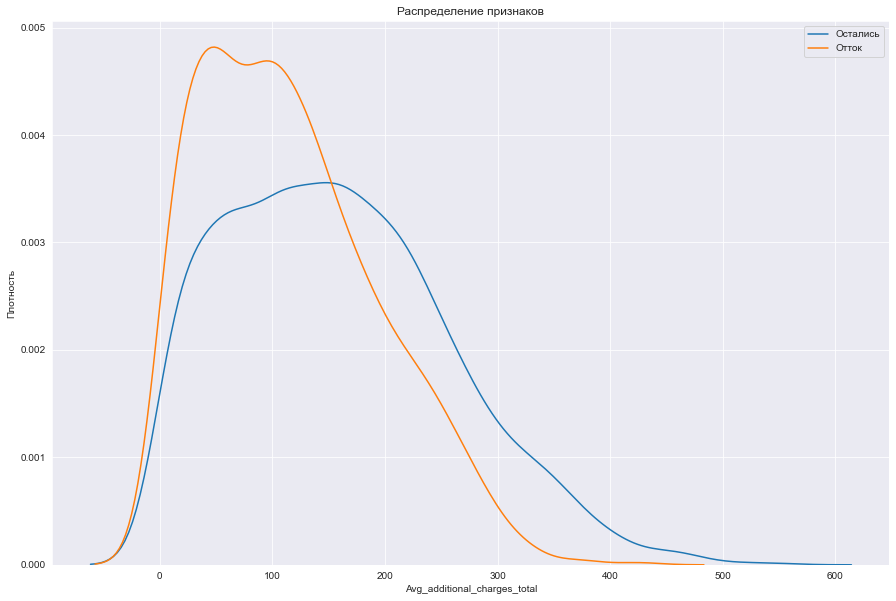

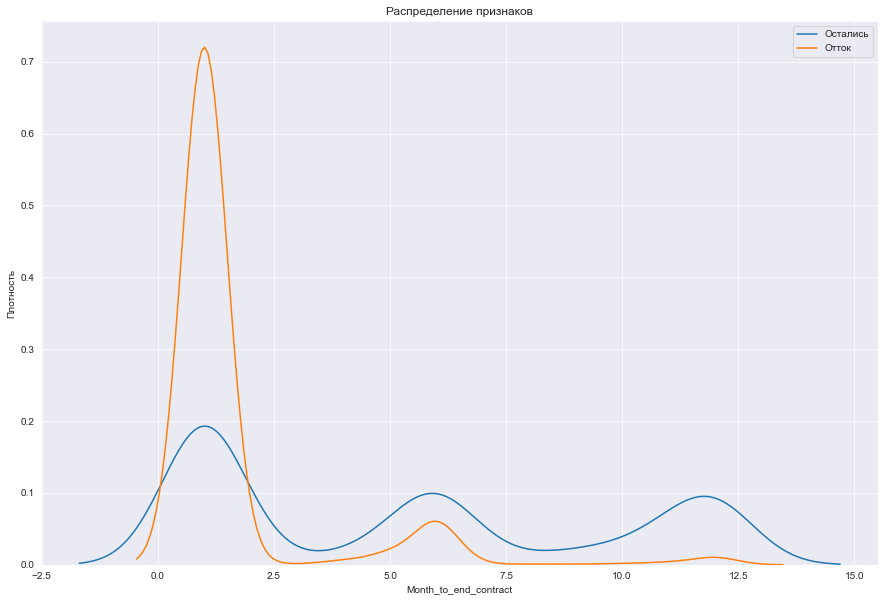

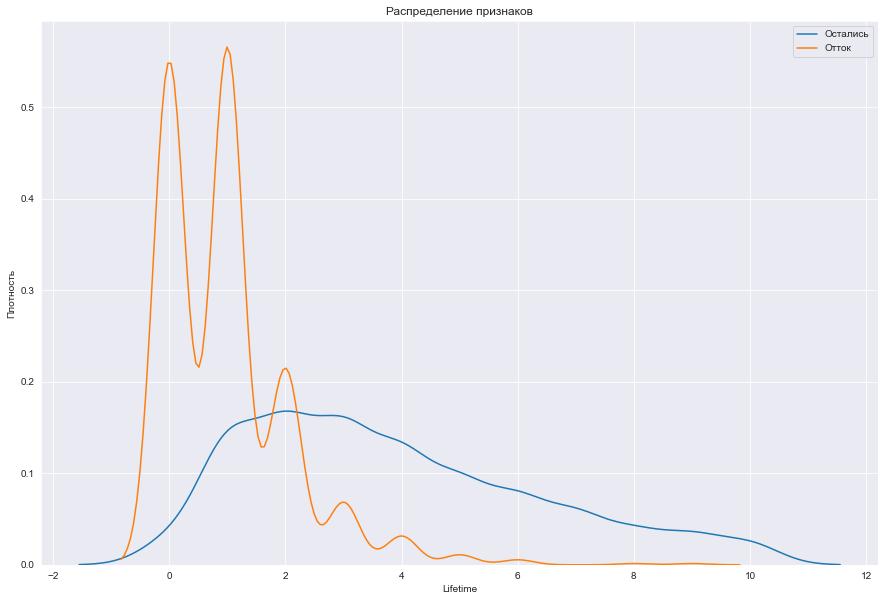

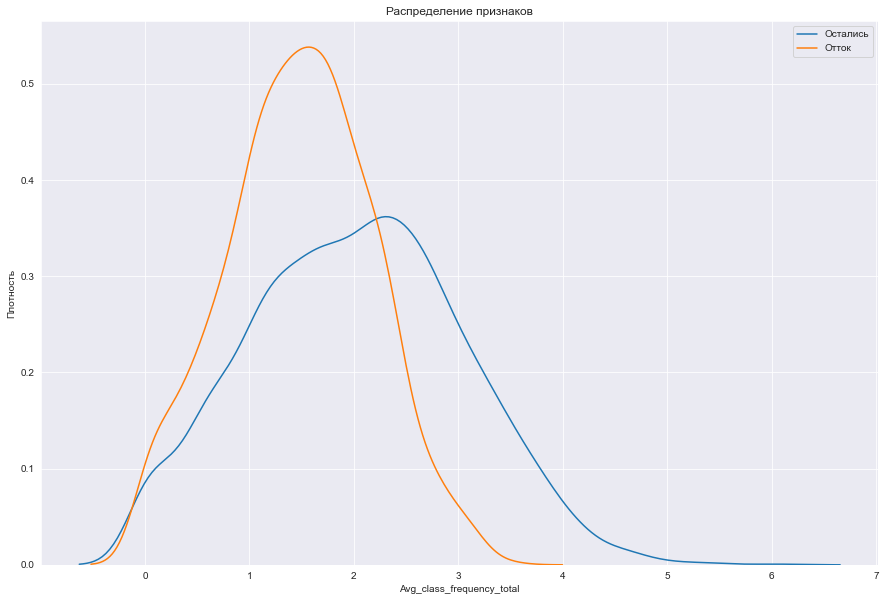

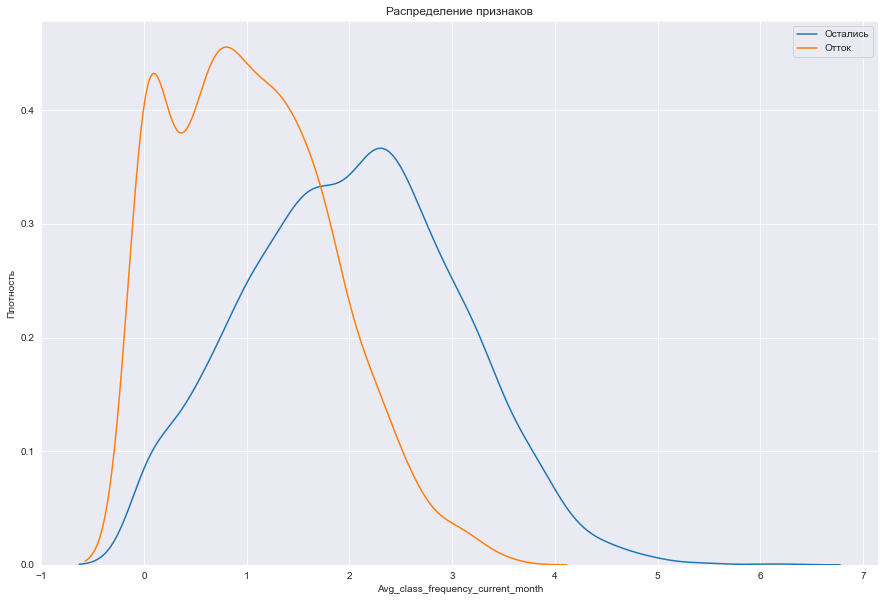

In [ ]:
for col in df.columns:
    if col != 'Churn':
        plt.figure(figsize=(15, 10))
        sns.kdeplot(not_churned[col], label='Остались')
        sns.kdeplot(churned[col], label='Отток')
        plt.xlabel(col)
        plt.ylabel('Плотность')
        plt.legend()
        plt.title('Распределение признаков')
        plt.show()

###### Наблюдения:

Распределение пользователей по целевому признаку не равномерно, а равно 1 к 2.5. Преобладает информация о клиентах не попавших в "отток".

У пользователей из группы "отток" преобладают следующие признаки:

* Они редко являются участниками акции "Приведи друга";
* В основном проживают/ работают в районе фитнес-центра;
* Длительность абонемента не превышает более месяца;
* Редко ходят на групповые занятия;
* Средний возраст равен 27 годами;
* Срок до окончания текущего абонемента не более месяца;
* Время с момента первого обращения не более месяца (новые клиенты);
* Средняя частота посещений не более 2 раз в неделю;

In [ ]:
cm = df.corr()

<AxesSubplot:title={'center':'Тепловая карта признаков'}>

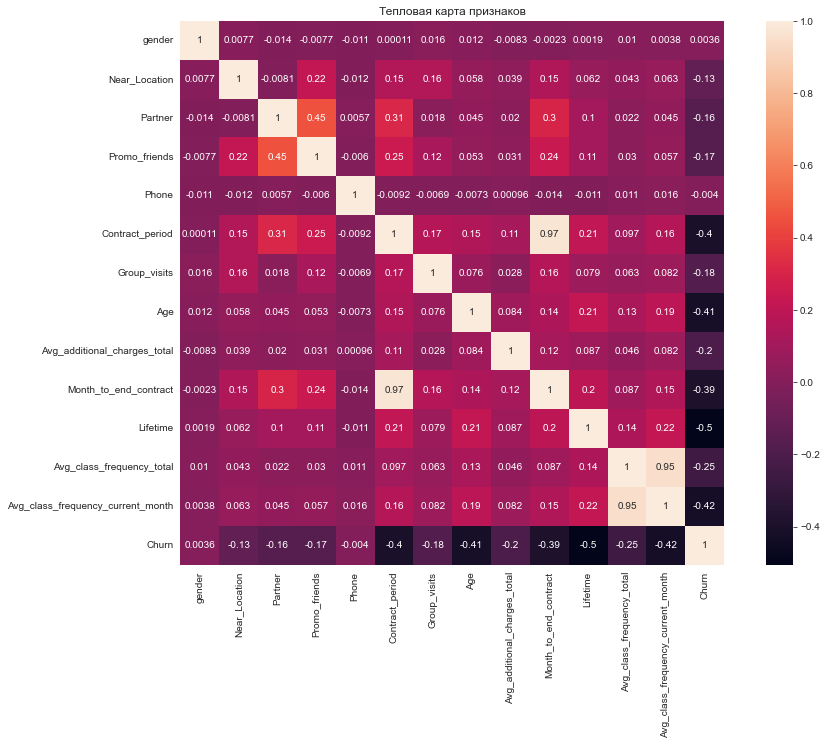

In [ ]:
plt.figure(figsize=(15, 10))
plt.title('Тепловая карта признаков')
sns.heatmap(cm, annot=True, square=True) 

###### Наблюдения:

Из матрицы корреляций видны сильные зависимости между следующими парами признаков:

* Срок до окончания текущего действующего абонемента <-> Длительность текущего действующего абонемента;
* Средняя частота посещений в неделю за предыдущий месяц <-> Средняя частота посещений в неделю за все время с начала действия абонемента;

Данные корреляции можно объяснить тем, что это "новые клиенты", которые посетили несколько раз фитнес-центр и более не ходили на занятия.

Также имеется небольшая корреляция у следующих пар признаков: 

* Участник акции "Приведи друга" <-> Сотрудник компании-партнёра клуба;
* Сотрудник компании-партнёра клуба <->  Длительность текущего действующего абонемента;
* Сотрудник компании-партнёра клуба <-> Срок до окончания текущего действующего абонемента;

Данные корреляции можно объяснить тем, что сотрудники компаний-партнера чаще рекомендуют фитнес-центр своим друзьям. При этом сотрудники компаний-партнера покупают длительные абонементы.

Мультиколлинеарность отражает наличие реальных связей или взаимосвязей между признаками. В данном случае, корреляция между признаками contract_period и month_to_end_contract может быть объяснена логической зависимостью, так как они оба отражают информацию о сроке контракта.  
Аналогично, корреляция между признаками Avg_class_frequency_total и Avg_class_frequency_current_month может быть обусловлена тем, что они оба относятся к частоте посещений занятий.  
В остальных признаках мультиколлинеарность не так сильно выражена, чтобы внести "помехи" в модели.

## Модель прогнозирования оттока клиентов

In [ ]:
## разбивка датасета на признаки и целевую
X = df.drop('Churn', axis=1)
y = df['Churn']
## разбивка на тестовую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

In [ ]:
## стандартизцаия признаков тестовой и валидационной выборки
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

## объявление моделей
models = [
    LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', max_iter=1000, penalty='l2'),
    RandomForestClassifier(random_state=RANDOM_STATE)
]

## функция обучения моделей и подсчета метрик
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(
        'Accuracy:{:.2f} Precision:{:.2f} Recall:{:.2f} F1:{:.2f} '.format(
            accuracy_score(y_test, y_pred),
            precision_score(y_test, y_pred),
            recall_score(y_test, y_pred),
            f1_score(y_test, y_pred),
        )
    )
    if isinstance(model, LogisticRegression):
        feature_importance = abs(model.coef_[0])
    elif isinstance(model, RandomForestClassifier):
        feature_importance = model.feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': df.columns[:-1], 'Importance': feature_importance})
    print(feature_importance_df)

# цикл, который выводит метрики по списку моделей
for i in models:
    print(i)
    make_prediction(i, X_train, y_train, X_test, y_test)

LogisticRegression(max_iter=1000, random_state=0, solver='liblinear')
Accuracy:0.92 Precision:0.89 Recall:0.83 F1:0.86 
                              Feature  Importance
0   gender                             0.109969  
1   Near_Location                      0.189991  
2   Partner                            0.152931  
3   Promo_friends                      0.489711  
4   Phone                              0.424943  
5   Contract_period                    0.205355  
6   Group_visits                       0.774637  
7   Age                                0.190196  
8   Avg_additional_charges_total       0.004627  
9   Month_to_end_contract              0.062383  
10  Lifetime                           0.953735  
11  Avg_class_frequency_total          3.311382  
12  Avg_class_frequency_current_month  3.969357  
RandomForestClassifier(random_state=0)
Accuracy:0.92 Precision:0.89 Recall:0.80 F1:0.85 
                              Feature  Importance
0   gender                             0.

###### Наблюдения:

Исходя из предоставленных метрик, обе модели - LogisticRegression и RandomForestClassifier - имеют высокую точность (Precision) и F1-меру (F1-score), что говорит о хорошей способности моделей правильно классифицировать отток клиентов.

LogisticRegression обладает интерпретируемостью и подходит для объяснения результатов, в то время как RandomForestClassifier обеспечивает высокую точность классификации, но может быть менее интерпретируемым из-за своей сложности. Выбор между моделями зависит от приоритетов, таких как интерпретируемость и точность, а также от размера и баланса классов в данных.

В данном случае предпочтительней будет модель LogisticRegression, так как она имеет меньшую сложность и требует меньше данных для обучения, что может помочь избежать переобучения и обеспечить лучшую обобщающую способность на небольшой выборке.

## Кластеризацию клиентов

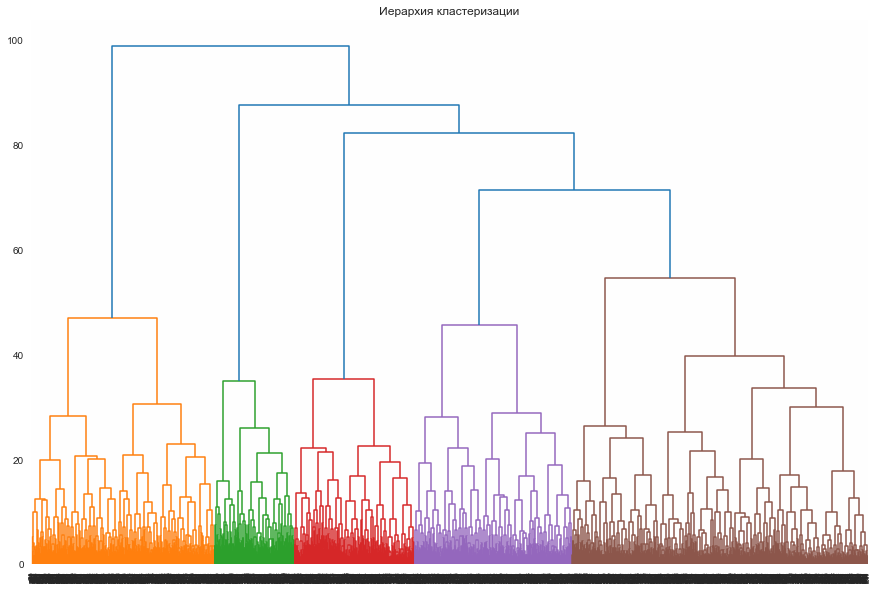

In [ ]:
## стандартизцаия признаков
sc = StandardScaler()
X_sc = sc.fit_transform(X)

## построение матрицы расстояний
linked = linkage(X_sc, method = 'ward')

## прорисовка дендограммы
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархия кластеризации')
plt.show() 

In [ ]:
## обучение модели
km = KMeans(n_clusters=5, random_state=RANDOM_STATE)
labels = km.fit_predict(X_sc)
## добавление столбца в датафрейм с обозначение кластера
df['cluster_km'] = labels
## выведем средние значения признаков для кластеров
print(df.groupby('cluster_km').mean())

              gender  Near_Location   Partner  Promo_friends     Phone  \
cluster_km                                                               
0           0.485132  1.000000       0.349193  0.235344       1.000000   
1           0.493776  0.000000       0.473029  0.078838       1.000000   
2           0.523810  0.854342       0.476190  0.316527       0.000000   
3           0.498929  0.955032       0.785867  0.566381       1.000000   
4           0.553086  0.974074       0.353086  0.244444       0.998765   

            Contract_period  Group_visits        Age  \
cluster_km                                             
0           1.944775         0.334749      28.064571   
1           2.228216         0.213693      28.439834   
2           4.756303         0.417367      29.229692   
3           10.907923        0.535332      29.966809   
4           2.609877         0.481481      30.185185   

            Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
cluster_km 

In [ ]:
## функция отрисовки графиков попарных признаков для кластеров
def show_clusters_on_plot(df, x_name, y_name, cluster_name):
    plt.figure(figsize=(15, 10))
    sns.scatterplot(
        x=df[x_name], y=df[y_name], hue=df[cluster_name], palette='Paired'
    )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

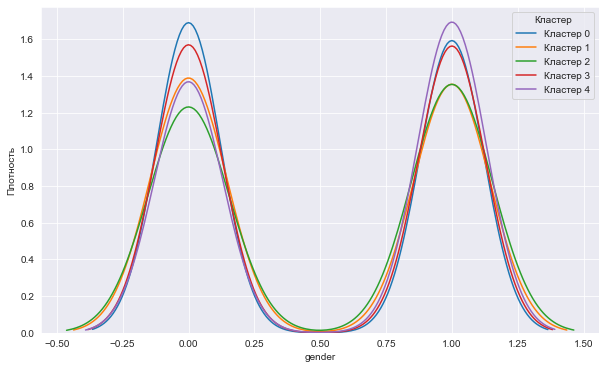

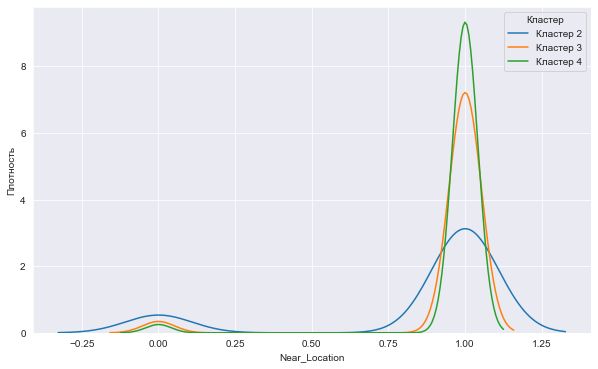

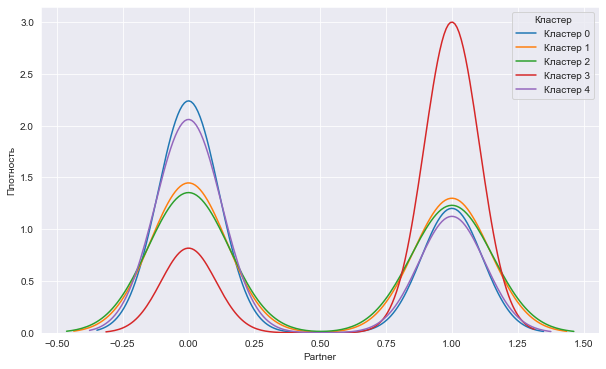

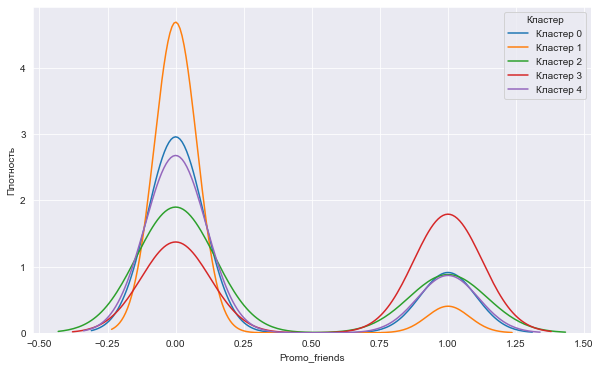

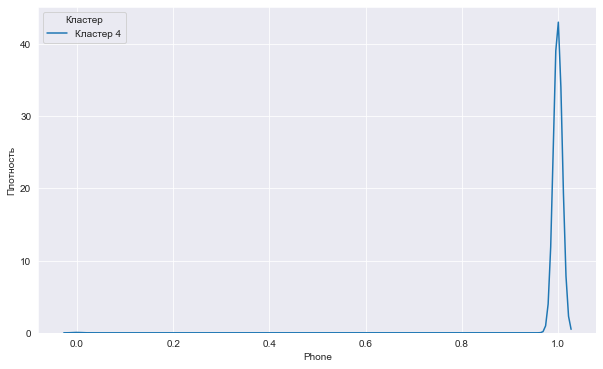

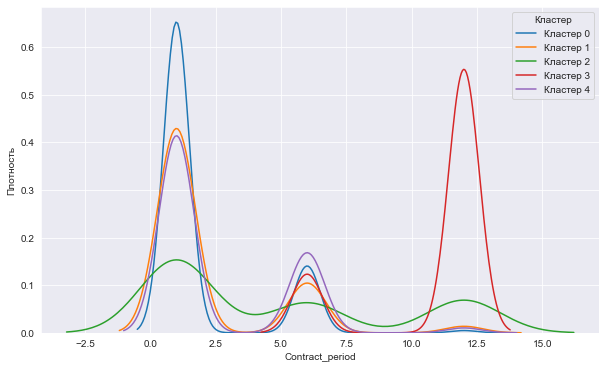

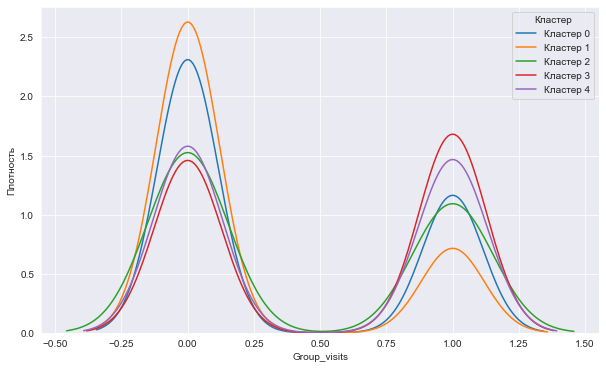

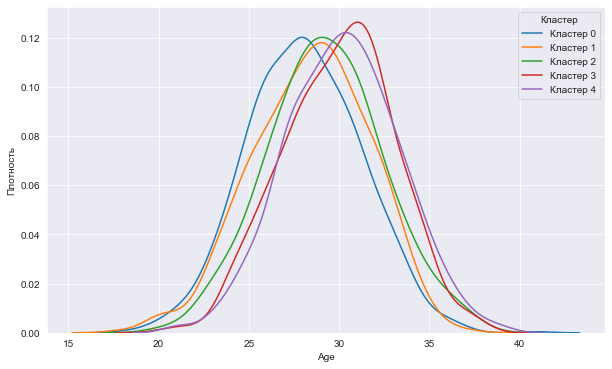

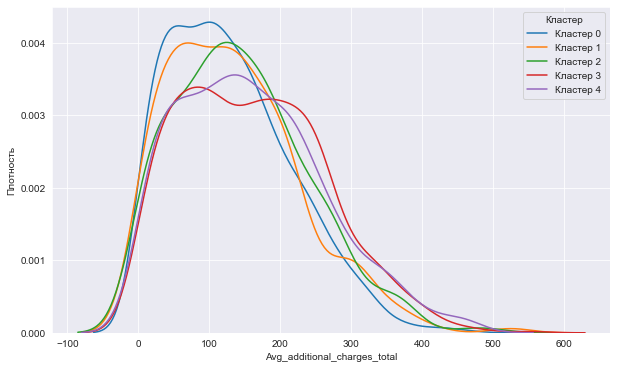

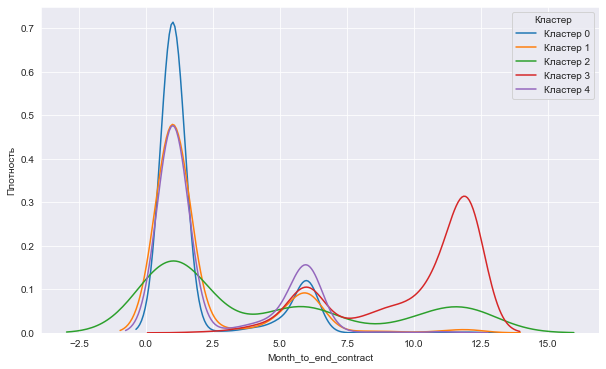

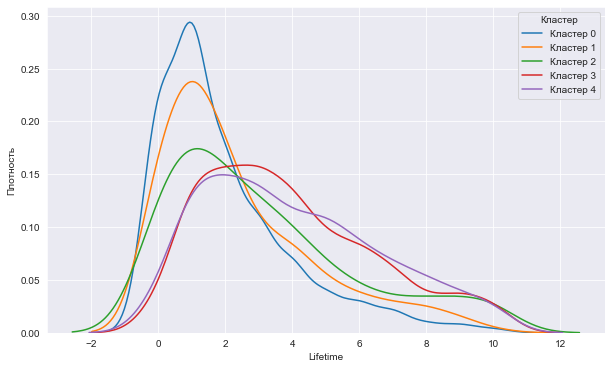

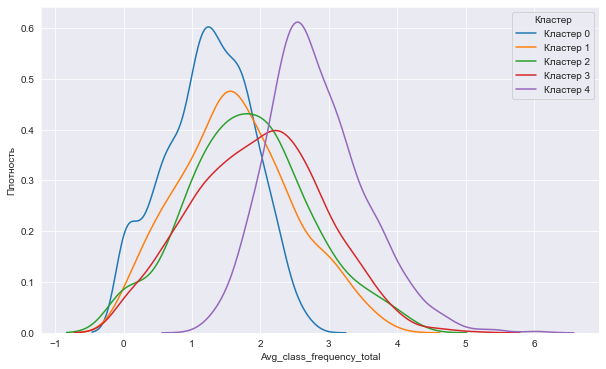

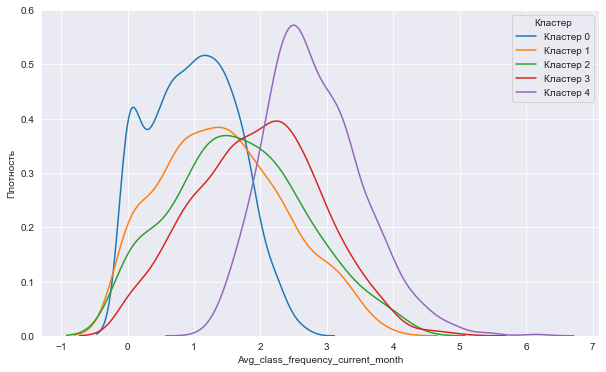

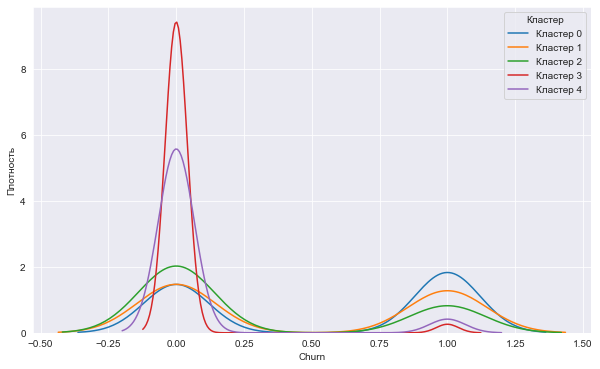

In [ ]:
##  зададим переменную определяюущую количество класеров
num_clusters = len(df['cluster_km'].unique())

## построение графиков распределения признаков по кластерам через цикл
for feature in df:
    if feature != 'cluster_km':  # Проверка, чтобы не отрисовывать график с самим столбцом 'Кластер'
        plt.figure(figsize=(10, 6))
        for cluster in range(num_clusters):
            data = df[df['cluster_km'] == cluster][feature]
            if np.var(data) > 0:  # Проверка на ненулевую дисперсию
                sns.kdeplot(data=data, label=f'Кластер {cluster}')
        plt.xlabel(feature)
        plt.ylabel('Плотность')
        plt.legend(title='Кластер')
        plt.show()

In [ ]:
## Додя оттока для каждого кластера
churn_rate = df.groupby('cluster_km')['Churn'].mean()
churn_rate

cluster_km
0    0.554800
1    0.464730
2    0.288515
3    0.026767
4    0.069136
Name: Churn, dtype: float64

###### Наблюдения:

* Признак "gender" не имеет существенного влияния на отток. Доля оттока примерно одинакова для всех кластеров.

* Признак "Near_Location" является важным фактором. Кластеры 1 и 2, у которых меньше клиентов, живущих рядом с клубом, имеют более высокую долю оттока по сравнению с другими кластерами.

* Признак "Partner" и "Promo_friends" также оказывают влияние на отток. Кластеры 0 и 1, у которых меньше клиентов, участвующих в партнерской программе и приводящих друзей, имеют более высокую долю оттока.

* Признак "Phone" не влияет на отток. Доля оттока примерно одинакова для всех кластеров.

* Признак "Contract_period" влияет на отток. Кластеры с более длительными абонементами (3 и 4) имеют более низкую долю оттока, в то время как кластеры с более короткими абонементами (0 и 1) имеют более высокую долю оттока.

* Признак "Group_visits" оказывает влияние на отток. Кластеры с более высокой долей посещения групповых занятий (3 и 4) имеют более низкую долю оттока, в то время как кластеры с меньшей долей посещения (0, 1 и 2) имеют более высокую долю оттока.

* Признак "Age" не имеет существенного влияния на отток. Распределение возраста примерно одинаково для всех кластеров.

* Признак "Avg_additional_charges_total" не имеет сильного влияния на отток. Распределение дополнительных расходов примерно одинаково для всех кластеров.

* Признак "Month_to_end_contract" влияет на отток. Кластеры с более длительным оставшимся сроком абонемента (3 и 4) имеют более низкую долю оттока.

* Признак "Lifetime" влияет на отток. Кластеры с более длительным временем существования (3 и 4) имеют более низкую долю оттока.

* Признак "Avg_class_frequency_total"  и "Avg_class_frequency_current_month" влияют на отток. Кластеры с более высокой средней частотой посещений (3 и 4) имеют более низкую долю оттока.

Исходя из этих наблюдений, кластеры 3 и 4 являются наиболее надежными с более низкой долей оттока, в то время как кластеры 0 и 1 склонны к оттоку с более высокой долей оттока.

## Выводы и базовые рекомендации по работе с клиентами

**Основные выводы и рекомендации:**

* Близость к фитнес-центру играет важную роль в удержании клиентов. Клиенты, живущие рядом с клубом, имеют меньшую долю оттока. Рекомендация: акцентировать внимание на привлечении и удержании клиентов из близлежащих районов. Пример действия: предложение специальных акций и скидок для жителей близлежащих районов.

* Участие в партнерской программе и привлечение друзей снижают вероятность оттока. Клиенты, участвующие в партнерской программе и приглашающие друзей, имеют более низкую долю оттока. Рекомендация: разработать маркетинговые программы для стимулирования клиентов привлекать друзей и знакомых в фитнес-центр. Пример действия: предложение бесплатного занятия или скидки клиенту, который приведет нового члена.

* Длительные абонементы и участие в групповых занятиях снижают вероятность оттока. Клиенты с более длительными абонементами и более высокой посещаемостью групповых занятий имеют более низкую долю оттока. Рекомендация: предлагать клиентам более выгодные условия при покупки длительных абонементов и активно продвигать групповые занятия. Пример действия: предложение скидки на продление абонемента на длительный срок и расширение ассортимента групповых занятий.

* Уделять внимание новым клиентам и стимулировать регулярные посещения. Клиенты, которые недавно присоединились к фитнес-центру и посещают занятия с высокой частотой, имеют более низкую долю оттока. Рекомендация: разработать программы привлечения новых клиентов и поощрять их регулярные посещения. Пример действия: предложение бесплатных индивидуальных тренировок или персонального плана тренировок для новых клиентов, а также скидки на абонементы для регулярных посетителей.

Эти рекомендации и действия помогут укрепить взаимодействие с клиентами и снизить отток, привлекая новых клиентов и удерживая существующих.